## Module 2 :- Assignment (Part B) -  Neil Chapman (matriculation number = 40416167 )
### (Models Learnt from Course)

### Import required libraries

In [1]:
import json
from pprint import pprint
import pandas as pd
import nltk
%matplotlib inline
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
import re
import nltk.classify.util, nltk.metrics
from nltk.classify import NaiveBayesClassifier
import math

import numpy as np
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

### Load in Data from JSON files

In [2]:
s_data = ''
r_data = ''
n_data = ''
with open('sexism.json') as f:
    s_data = [json.loads(line) for line in f]
with open('racism.json') as f:
    r_data = [json.loads(line) for line in f]
with open('neither.json') as f:
    n_data = [json.loads(line) for line in f]

### Convert the dictionary (json files) into a Panda's Dataframe, using json_normalize utility
Using the pandas library,so that we can then store the json files into an easily manageable way, that will also provide us with a way of analysing the data/text within the files.

In [3]:
# import the json_normalize package from pandas
from pandas.io.json import json_normalize

In [4]:
# load up the data from the dictionaries into pandas dataframes, using the json_normalize function
sf = pd.DataFrame.from_dict(json_normalize(s_data), orient='columns')
rf = pd.DataFrame.from_dict(json_normalize(r_data), orient='columns')
nf = pd.DataFrame.from_dict(json_normalize(n_data), orient='columns')

#### Check the head of each dataframe

In [5]:
# show first 5 lines of sf
sf.head()

,Annotation,contributors,coordinates,coordinates.coordinates,coordinates.type,created_at,entities.hashtags,entities.media,entities.symbols,entities.urls,...,user.profile_sidebar_fill_color,user.profile_text_color,user.profile_use_background_image,user.protected,user.screen_name,user.statuses_count,user.time_zone,user.url,user.utc_offset,user.verified
0,sexism,None,NaN,NaN,NaN,Mon Mar 02 10:41:54 +0000 2015,"[{'indices': [24, 28], 'text': 'MKR'}, {'indic...",NaN,[],[],...,FC883B,FD6D4B,True,False,hermosavogue_,4720,Brisbane,https://t.co/0uhcZncwmq,36000.0,False
1,sexism,None,NaN,NaN,NaN,Mon Mar 02 10:50:18 +0000 2015,"[{'indices': [0, 14], 'text': 'katieandnikki'}...",NaN,[],[],...,DDEEF6,333333,True,False,Mythri89,9281,Brisbane,None,36000.0,False
2,sexism,None,NaN,NaN,NaN,Mon Mar 02 10:49:56 +0000 2015,"[{'indices': [87, 91], 'text': 'MKR'}]",NaN,[],[],...,DDEEF6,333333,True,False,midnight_show,3165,Brisbane,None,36000.0,False
3,sexism,None,NaN,NaN,NaN,Mon Mar 02 08:55:30 +0000 2015,"[{'indices': [127, 131], 'text': 'MKR'}]",NaN,[],[],...,DDEEF6,333333,True,False,colonelkickhead,14893,New Caledonia,None,39600.0,False
4,sexism,None,NaN,NaN,NaN,Mon Mar 02 10:48:54 +0000 2015,"[{'indices': [68, 72], 'text': 'MKR'}]",NaN,[],[],...,DDEEF6,333333,True,False,lilbeastunleash,1474,None,None,NaN,False


In [6]:
# show first 5 lines of rf
rf.head()

,Annotation,contributors,coordinates,coordinates.coordinates,coordinates.type,created_at,entities.hashtags,entities.media,entities.symbols,entities.urls,...,user.profile_text_color,user.profile_use_background_image,user.protected,user.screen_name,user.statuses_count,user.time_zone,user.url,user.utc_offset,user.verified,withheld_in_countries
0,racism,None,NaN,NaN,NaN,Mon Mar 02 10:29:34 +0000 2015,"[{'indices': [96, 100], 'text': 'MKR'}]",NaN,[],[],...,333333,True,False,thefoxbandit,23,None,None,NaN,False,NaN
1,racism,None,NaN,"[153.37975174, -28.07334137]",Point,Mon Mar 02 10:23:41 +0000 2015,"[{'indices': [46, 50], 'text': 'mkr'}]",NaN,[],[],...,333333,True,False,trish2295,180,None,None,NaN,False,NaN
2,racism,None,NaN,NaN,NaN,Mon Mar 02 10:19:37 +0000 2015,"[{'indices': [49, 53], 'text': 'MKR'}]",NaN,[],[],...,222222,True,False,foodbling,20832,Brisbane,https://t.co/r5Zmh0Ek1u,36000.0,False,NaN
3,racism,None,NaN,NaN,NaN,Mon Mar 02 09:56:43 +0000 2015,"[{'indices': [71, 75], 'text': 'MKR'}]",NaN,[],[],...,333333,True,False,lilbeastunleash,1474,None,None,NaN,False,NaN
4,racism,None,NaN,NaN,NaN,Mon Mar 02 09:48:33 +0000 2015,"[{'indices': [95, 99], 'text': 'MKR'}]",NaN,[],[],...,0C3E53,True,False,JL_Whitaker,37343,None,http://t.co/ZLC2pgfiKe,NaN,False,NaN


In [7]:
# show first 5 lines of nf
nf.head()

,Annotation,contributors,coordinates,coordinates.coordinates,coordinates.type,created_at,entities.hashtags,entities.media,entities.symbols,entities.urls,...,user.profile_text_color,user.profile_use_background_image,user.protected,user.screen_name,user.statuses_count,user.time_zone,user.url,user.utc_offset,user.verified,withheld_in_countries
0,none,None,NaN,NaN,NaN,Mon Mar 02 10:47:12 +0000 2015,"[{'text': 'mkr', 'indices': [22, 26]}]",NaN,[],[],...,333333,True,False,sales88194029,938,None,None,NaN,False,NaN
1,none,None,NaN,NaN,NaN,Mon Mar 02 10:51:11 +0000 2015,"[{'text': 'MKR', 'indices': [36, 40]}]",NaN,[],[],...,4C52C7,True,False,KrapmatiK,162020,Hawaii,None,-36000.0,False,NaN
2,none,None,NaN,NaN,NaN,Mon Mar 02 10:51:01 +0000 2015,"[{'text': 'MKR', 'indices': [0, 4]}, {'text': ...",NaN,[],[],...,333333,True,False,Drakahris95,1229,None,https://t.co/x72nz11IFn,NaN,False,NaN
3,none,None,NaN,NaN,NaN,Mon Mar 02 09:10:18 +0000 2015,"[{'text': 'MKR', 'indices': [83, 87]}]",NaN,[],[],...,333333,True,False,colonelkickhead,14893,New Caledonia,None,39600.0,False,NaN
4,none,None,NaN,NaN,NaN,Mon Mar 02 10:49:55 +0000 2015,"[{'text': 'mkr', 'indices': [109, 113]}]",NaN,[],[],...,333333,True,False,ScheherazadeM,587,Brisbane,None,36000.0,False,NaN


#### Checking total records/number of tweets in each dataset file

In [8]:
# checking the length / number of rows in each dataset that has been loaded up
# sf = sexism.json
# rf = racism.json
# nf = neither.json
print("Number of Tweets in sexism.json = " + str(len(sf)))
print("Number of Tweets in racism.json = " + str(len(rf)))
print("Number of Tweets in neither.json = " + str(len(nf)))

Number of Tweets in sexism.json = 3430
Number of Tweets in racism.json = 1976
Number of Tweets in neither.json = 11501


In [9]:
sf['text'].head()

0                These two are revolting #MKR #MKR2015
1    #katieandnikki stop calling yourselves pretty ...
2    If @Channel7 keep these girls in the comp, whi...
3    The menus look like they were made by a 5 year...
4    Wish these blondes were in that How To Get Awa...
Name: text, dtype: object

In [10]:
# create new dataframes raw_text, from source files/dataframes with 2 columns, text and 'abusive_flag'
# abusive_flag will by 1 (yes, abusive text) for both SF sourced data and RF sourced data, for NF it will be 0
# and finally concatenate all 3 into one dataframe, raw_text, to then be used for modelling.
raw_text_sf = pd.DataFrame()
raw_text_nf = pd.DataFrame()
raw_text_rf = pd.DataFrame()

raw_text_sf = sf.loc[:,['text']]
raw_text_sf.loc[:,'abusive_flag']=1

raw_text_rf = rf.loc[:,['text']]
raw_text_rf.loc[:,'abusive_flag']=2

raw_text_nf = nf.loc[:,['text']]
raw_text_nf.loc[:,'abusive_flag']=0

raw_text = pd.concat([raw_text_sf,raw_text_rf,raw_text_nf])
raw_text.shape[0]

16907

In [11]:
raw_text['abusive_flag'].value_counts()

0    11501
1     3430
2     1976
Name: abusive_flag, dtype: int64

In [12]:
# make the raw_text.text field, lowercase
raw_text['text'] = [entry.lower() for entry in raw_text['text']]
raw_text.head()

,text,abusive_flag
0,these two are revolting #mkr #mkr2015,1
1,#katieandnikki stop calling yourselves pretty ...,1
2,"if @channel7 keep these girls in the comp, whi...",1
3,the menus look like they were made by a 5 year...,1
4,wish these blondes were in that how to get awa...,1


### Pre-Processing Data
Utilisation of code from part A of assignment, to pre-process the data.
- remove stop words (more non-words added, eg. http, rt etc)
- stemming
- tokenize

In [13]:
# Re-use code from part A of assignment
# import Stemmer modules from nltk and regular expressions
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
tkn = TweetTokenizer(strip_handles=True)
words = stopwords.words("english")
# adding extra words here to stopwords, ie. http, mkr (which seems to be a twitter hashtag)
# also added others ie. "co" which perhaps is a result of 
# some URL's included in tweets ?
words.append('mkr')
words.append('MKR')
words.append('rt')
words.append('RT')
words.append('http')
words.append('co')
stemmer = PorterStemmer()
stemmer2 = SnowballStemmer('english')
raw_text['text_clean']=''
# re.sub : regular expression to remove unwanted characters, ie. %, & etc
raw_text['text_clean'] = raw_text['text'].apply(lambda x: [" ".join(tkn.tokenize(i)) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words])
raw_text['text_clean'] = raw_text['text_clean'].apply(lambda x: " ".join([stemmer2.stem(i) for i in x]).lower())
raw_text['text_clean'] = raw_text['text_clean'].apply(lambda x: str(word_tokenize(x)))
raw_text['text_clean'].head()

0                                    ['two', 'revolt']
1    ['katieandnikki', 'stop', 'call', 'pretti', 'h...
2    ['channel', 'keep', 'girl', 'comp', 'suspect',...
3    ['menus', 'look', 'like', 'made', 'year', 'old...
4    ['wish', 'blond', 'get', 'away', 'murder', 'sh...
Name: text_clean, dtype: object

In [14]:
# set seed for reproducibility
np.random.seed(99)

In [15]:
# reset the index for the raw_text dataframe, this is due it being merged from 3 different dataframes,
# so index needs resetting, ie. 0,1,2,3,4,.....
raw_text = raw_text.reset_index(drop=True)
raw_text.head()

,text,abusive_flag,text_clean
0,these two are revolting #mkr #mkr2015,1,"['two', 'revolt']"
1,#katieandnikki stop calling yourselves pretty ...,1,"['katieandnikki', 'stop', 'call', 'pretti', 'h..."
2,"if @channel7 keep these girls in the comp, whi...",1,"['channel', 'keep', 'girl', 'comp', 'suspect',..."
3,the menus look like they were made by a 5 year...,1,"['menus', 'look', 'like', 'made', 'year', 'old..."
4,wish these blondes were in that how to get awa...,1,"['wish', 'blond', 'get', 'away', 'murder', 'sh..."


#### Train / Test split of data
75% / 25%

In [16]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(raw_text['text_clean'], 
                                                                      raw_text['abusive_flag'], test_size=0.25)

### Feature Extraction
Using Bag of words, and a popular approach known as TF-IDF
see https://towardsdatascience.com/machine-learning-text-processing-1d5a2d638958


#### Word Vectorization
Fo this model, I will use TF-IDF, for word vectorization.

TF-IDF = “Term Frequency — Inverse Document Frequency"

- Term Frequency: This summarizes how often a given word appears within a document.
- Inverse Document Frequency: This down scales words that appear a lot across documents.

The method will fit a TF-IDF model on the whole corpus, and this will help build a vocabulary of words, which it has learnt from the corpus. A unique integer will be assigned to each word in the vocab. There will be a maximum of 5000 words. (max_features = 50000).

The Train_X and Test_X datasets are transformed, to the vectorized versions Train_X_Tfidf and Test_X_Tfidf. These will now contain for each row a list of unique integer number and its associated importance as calculated by TF-IDF.

In [17]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(raw_text['text_clean'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [18]:
print(Tfidf_vect.vocabulary_)

{'two': 4602, 'revolt': 3685, 'katieandnikki': 2428, 'stop': 4214, 'call': 626, 'pretti': 3417, 'hot': 2073, 'say': 3840, 'million': 2837, 'time': 4480, 'make': 2687, 'either': 1356, 'stfu': 4201, 'channel': 716, 'keep': 2434, 'girl': 1820, 'comp': 889, 'suspect': 4300, 'never': 3004, 'watch': 4804, 'rig': 3704, 'look': 2633, 'like': 2594, 'made': 2677, 'year': 4946, 'old': 3120, 'littl': 2613, 'case': 674, 'mental': 2800, 'age': 77, 'guess': 1913, 'wish': 4877, 'blond': 492, 'get': 1804, 'away': 318, 'murder': 2933, 'show': 3982, 'butcher': 610, 'tell': 4394, 'red': 3608, 'cook': 964, 'dumb': 1303, 'mmm': 2867, 'perhap': 3277, 'delus': 1143, 'face': 1519, 'need': 2990, 'pull': 3483, 'mykitchenrul': 2951, 'sassi': 3827, 'food': 1661, 'feel': 1582, 'ol': 3119, 'vile': 4743, 'peopl': 3271, 'killerblond': 2459, 'omg': 3127, 'restaur': 3672, 'room': 3749, 'oh': 3111, 'gosh': 1859, 'think': 4450, 'pro': 3433, 'oop': 3142, 'can': 641, 'not': 3052, 'anyth': 194, 'nice': 3014, 'noth': 3057, 's

In [19]:
print(Train_X_Tfidf)

  (0, 4895)	0.174227622113
  (0, 3949)	0.356996885455
  (0, 3930)	0.33253534378
  (0, 3091)	0.337987687719
  (0, 2645)	0.227158359577
  (0, 2483)	0.271747917836
  (0, 2457)	0.230306652867
  (0, 2269)	0.410888153589
  (0, 1474)	0.280914984675
  (0, 859)	0.339964536886
  (0, 754)	0.274909680281
  (1, 2990)	0.441334497634
  (1, 2911)	0.63451708456
  (1, 336)	0.63451708456
  (2, 4585)	0.290095389682
  (2, 4210)	0.411068078511
  (2, 2594)	0.178319270163
  (2, 2271)	0.181022243085
  (2, 2130)	0.272666342231
  (2, 2094)	0.267428158873
  (2, 1711)	0.313818041458
  (2, 1573)	0.3307380147
  (2, 1213)	0.310591425477
  (2, 1174)	0.369571230986
  (2, 688)	0.309057931306
  :	:
  (12677, 1481)	0.334021488777
  (12678, 4894)	0.266149401467
  (12678, 4882)	0.318946226281
  (12678, 3595)	0.319512408326
  (12678, 3585)	0.296146554539
  (12678, 3060)	0.273714115572
  (12678, 3058)	0.359798400484
  (12678, 2884)	0.383136490004
  (12678, 1582)	0.278342153052
  (12678, 715)	0.320084916558
  (12678, 626)	0.23

#### Naive Bayes Classifier Algorithm

In [20]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  80.175065058


#### Support Vector Machine

In [21]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  83.9602555004


#### Evaluation of Model / Metrics (10-Fold Cross Validation)

SVM Evaluation

In [22]:
# 10-fold cross validation
mod = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(mod, Test_X_Tfidf, Test_Y, cv=10)
scores   

array([ 0.79481132,  0.82311321,  0.82783019,  0.79481132,  0.79009434,
        0.8056872 ,  0.81753555,  0.82422803,  0.80997625,  0.84085511])

In [23]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.81 (+/- 0.03)


In [24]:
mod = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(mod, Test_X_Tfidf, Test_Y, cv=10, scoring='f1_macro')
scores 

array([ 0.7083179 ,  0.75666654,  0.73815307,  0.69563324,  0.69218646,
        0.70807489,  0.73772791,  0.75994213,  0.70893113,  0.76724586])

In [25]:
print("F1-Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

F1-Score: 0.73 (+/- 0.05)


Naive Bayes Evaluation

In [26]:
# 10-fold cross validation
modN = naive_bayes.MultinomialNB()
scoresN = cross_val_score(modN, Test_X_Tfidf, Test_Y, cv=10)
scoresN   

array([ 0.73349057,  0.71226415,  0.73584906,  0.72877358,  0.73584906,
        0.72748815,  0.74881517,  0.75059382,  0.74109264,  0.74346793])

In [27]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresN.mean(), scoresN.std() * 2))

Accuracy: 0.74 (+/- 0.02)


In [28]:
# 10-fold cross validation
modN = naive_bayes.MultinomialNB()
scoresN = cross_val_score(modN, Test_X_Tfidf, Test_Y, cv=10, scoring = 'f1_macro')
scoresN 

array([ 0.52275471,  0.4683605 ,  0.49365079,  0.50767831,  0.50228237,
        0.492459  ,  0.54538196,  0.55078722,  0.50598145,  0.50862069])

In [29]:
print("F1-Score: %0.2f (+/- %0.2f)" % (scoresN.mean(), scoresN.std() * 2))

F1-Score: 0.51 (+/- 0.05)


#### Confusion Matrix

Confusion Matrix - SVM

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Test_Y, predictions_SVM)

In [31]:
conf_mat

array([[2676,   82,   89],
       [ 351,  544,    0],
       [ 152,    4,  329]])

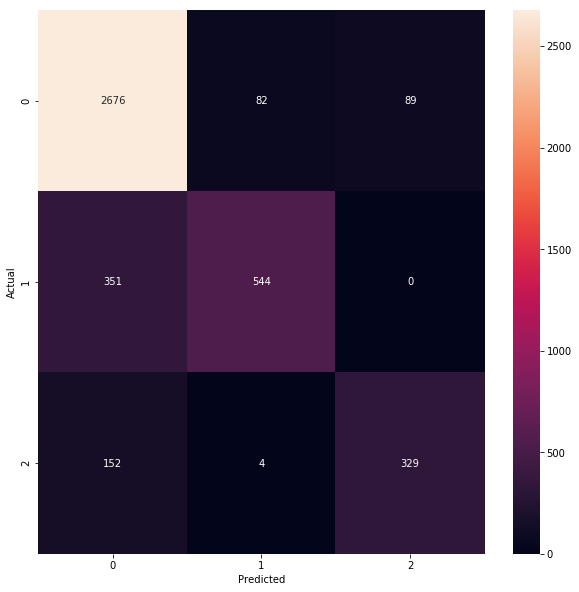

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
            #,
            #xticklabels=raw_text.abusive_flag.values, yticklabels=raw_text.abusive_flag.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Confusion Matrix - Naive Bayes

In [33]:
conf_mat = confusion_matrix(Test_Y, predictions_NB)
conf_mat

array([[2719,   43,   85],
       [ 486,  409,    0],
       [ 224,    0,  261]])

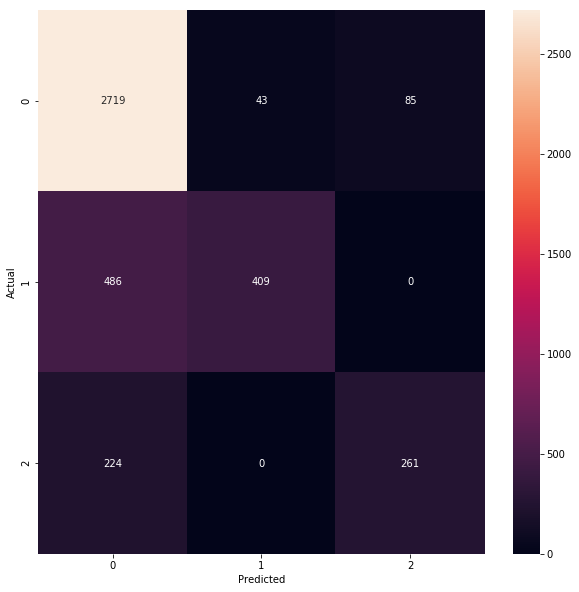

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
            #,
            #xticklabels=raw_text.abusive_flag.values, yticklabels=raw_text.abusive_flag.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Summary Evaluation Metrics - Utilising SKLEARN (Precision / Recall / F1-Score)

SVM Summary

In [35]:
from sklearn import metrics
print(metrics.classification_report(Test_Y, predictions_SVM))
      #                              target_names=raw_text['abusive_flag'].unique().tolist()))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2847
           1       0.86      0.61      0.71       895
           2       0.79      0.68      0.73       485

   micro avg       0.84      0.84      0.84      4227
   macro avg       0.83      0.74      0.78      4227
weighted avg       0.84      0.84      0.83      4227



In [36]:
from sklearn import metrics
print(metrics.classification_report(Test_Y, predictions_NB))
      #                              target_names=raw_text['abusive_flag'].unique().tolist()))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      2847
           1       0.90      0.46      0.61       895
           2       0.75      0.54      0.63       485

   micro avg       0.80      0.80      0.80      4227
   macro avg       0.82      0.65      0.70      4227
weighted avg       0.81      0.80      0.78      4227



#### Explanation of Metrics

see 
- https://towardsdatascience.com/precision-vs-recall-386cf9f89488
- https://medium.com/usf-msds/choosing-the-right-metric-for-evaluating-machine-learning-models-part-2-86d5649a5428


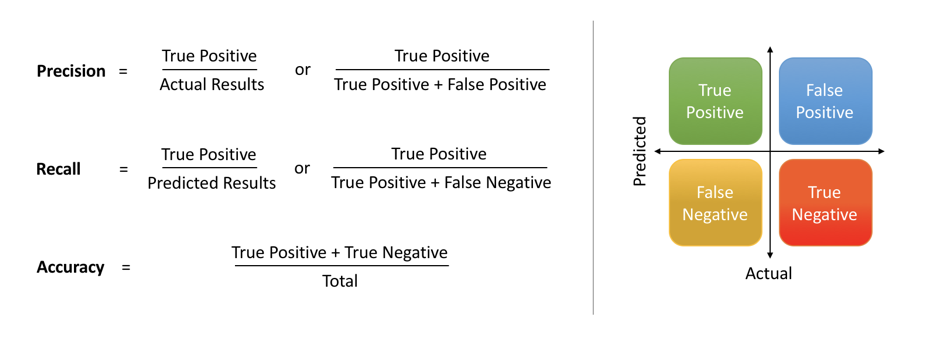

There are 4 important terms :

- True Positives  : The cases in which we predicted YES and the actual output was also YES.
- True Negatives  : The cases in which we predicted NO and the actual output was NO.
- False Positives : The cases in which we predicted YES and the actual output was NO.
- False Negatives : The cases in which we predicted NO and the actual output was YES.


- F1-Score

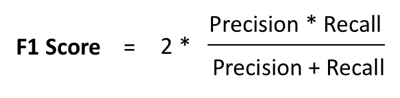


https://scikit-learn.org/stable/modules/cross_validation.html